In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score,  roc_auc_score

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('application_train.csv')

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.shape

(307511, 122)

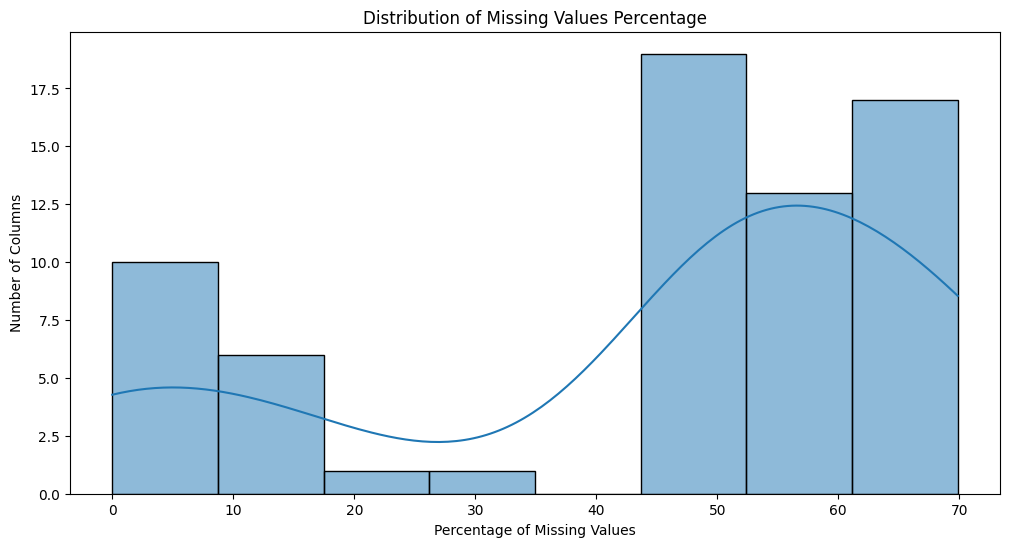

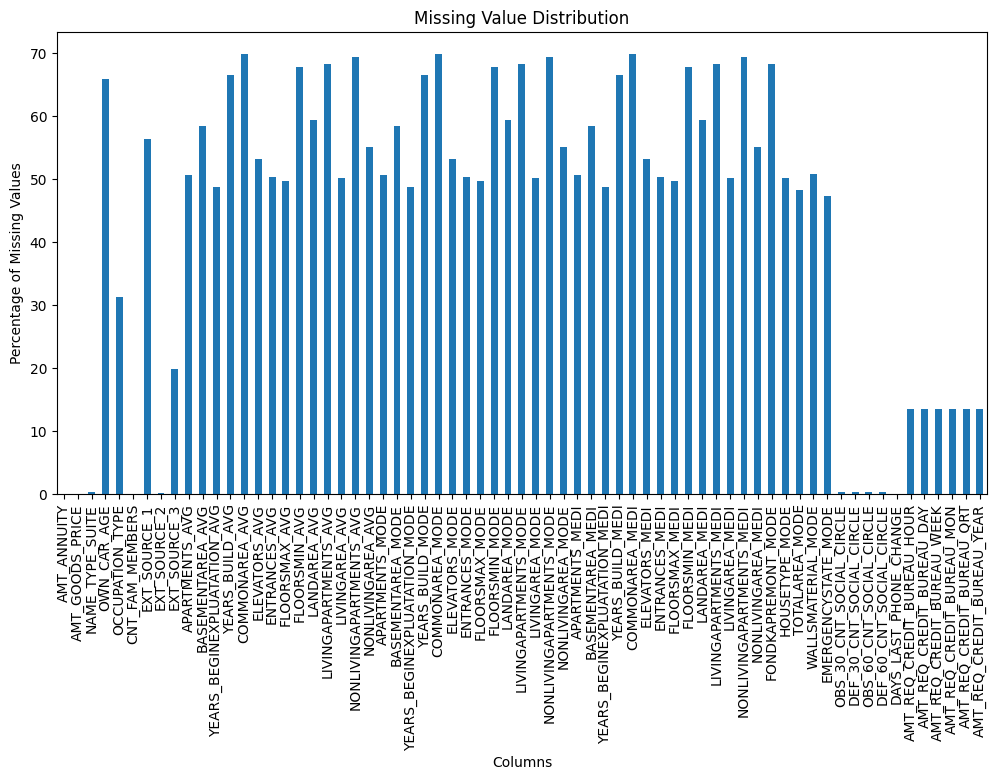

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().sum() * 100 / len(data)

# Filter columns with missing values
missing_columns = missing_percentage[missing_percentage > 0]

# Plotting the distribution of missing values
plt.figure(figsize=(12, 6))
sns.histplot(missing_columns, kde=True)
plt.title('Distribution of Missing Values Percentage')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Columns')
plt.show()

# Plotting the missing values as a bar plot
plt.figure(figsize=(12, 6))
missing_columns.plot(kind='bar')
plt.title('Missing Value Distribution')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [7]:
# Drop Columns that have more than 58% null values.

columns_list = data.columns.tolist()

for col in columns_list:
  null_percentage = (data[col].isnull().sum() / len(data)) * 100
  if null_percentage >= 58.0:
    print(f"{col}: {null_percentage} --- Droped")
    data.drop(columns=[col], inplace=True)

OWN_CAR_AGE: 65.9908100848425 --- Droped
BASEMENTAREA_AVG: 58.51595552679416 --- Droped
YEARS_BUILD_AVG: 66.49778381911543 --- Droped
COMMONAREA_AVG: 69.87229725115525 --- Droped
FLOORSMIN_AVG: 67.84862980511267 --- Droped
LANDAREA_AVG: 59.376737742714894 --- Droped
LIVINGAPARTMENTS_AVG: 68.35495315614726 --- Droped
NONLIVINGAPARTMENTS_AVG: 69.43296337366793 --- Droped
BASEMENTAREA_MODE: 58.51595552679416 --- Droped
YEARS_BUILD_MODE: 66.49778381911543 --- Droped
COMMONAREA_MODE: 69.87229725115525 --- Droped
FLOORSMIN_MODE: 67.84862980511267 --- Droped
LANDAREA_MODE: 59.376737742714894 --- Droped
LIVINGAPARTMENTS_MODE: 68.35495315614726 --- Droped
NONLIVINGAPARTMENTS_MODE: 69.43296337366793 --- Droped
BASEMENTAREA_MEDI: 58.51595552679416 --- Droped
YEARS_BUILD_MEDI: 66.49778381911543 --- Droped
COMMONAREA_MEDI: 69.87229725115525 --- Droped
FLOORSMIN_MEDI: 67.84862980511267 --- Droped
LANDAREA_MEDI: 59.376737742714894 --- Droped
LIVINGAPARTMENTS_MEDI: 68.35495315614726 --- Droped
NONLIVI

In [8]:
# Remove Rows with class 0 that have more than 30 columns null
null_counts = data.isnull().sum(axis=1)
rows_to_remove = (null_counts > 30) & (data['TARGET'] == 0)
data = data[~rows_to_remove]
print(f"Removed Rows Class 0: {rows_to_remove.sum()}")

Removed Rows Class 0: 19059


In [9]:
# Remove Duplicated rows
original_rows = len(data)
data = data.drop_duplicates()
removed_rows = original_rows - len(data)
print(f"Number of duplicate rows removed: {removed_rows}")


Number of duplicate rows removed: 0


In [10]:
data['TARGET'].value_counts()

TARGET
0    263627
1     24825
Name: count, dtype: int64

<Axes: xlabel='TARGET', ylabel='count'>

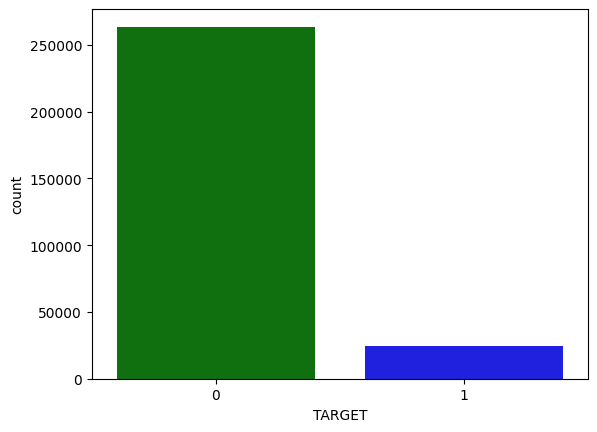

In [11]:
sns.countplot(x='TARGET', data=data, palette=['g','b'])

Analysis for: NAME_CONTRACT_TYPE
Unique values: ['Cash loans' 'Revolving loans']
Value counts:
NAME_CONTRACT_TYPE
Cash loans         261009
Revolving loans     27443
Name: count, dtype: int64
--------------------------------------------------


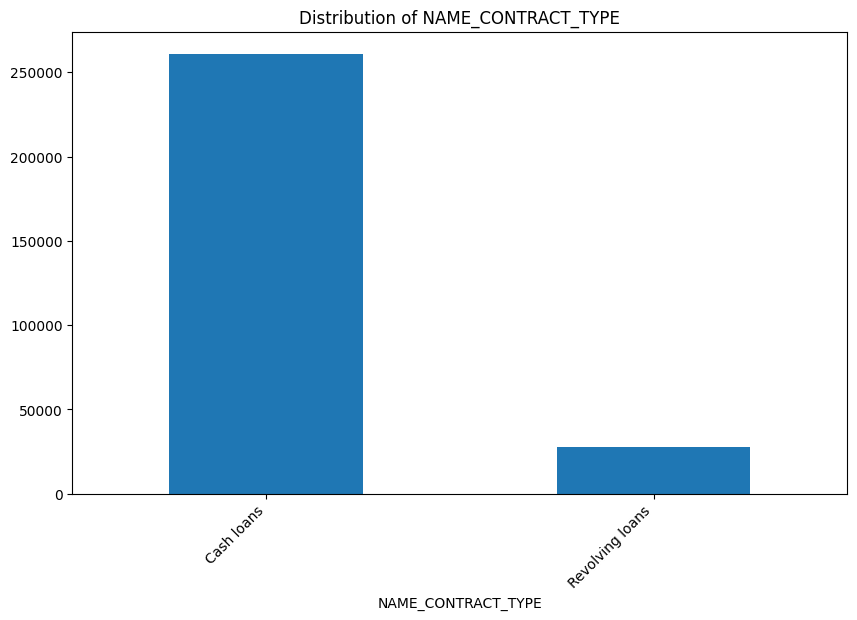

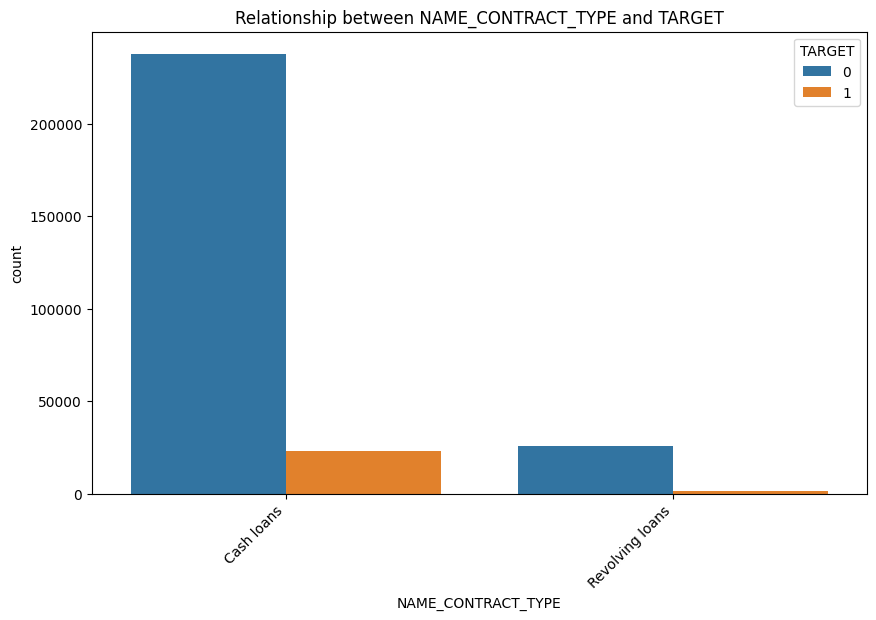

Analysis for: NAME_INCOME_TYPE
Unique values: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Value counts:
NAME_INCOME_TYPE
Working                 148344
Commercial associate     67679
Pensioner                51747
State servant            20634
Student                     17
Unemployed                  16
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
--------------------------------------------------


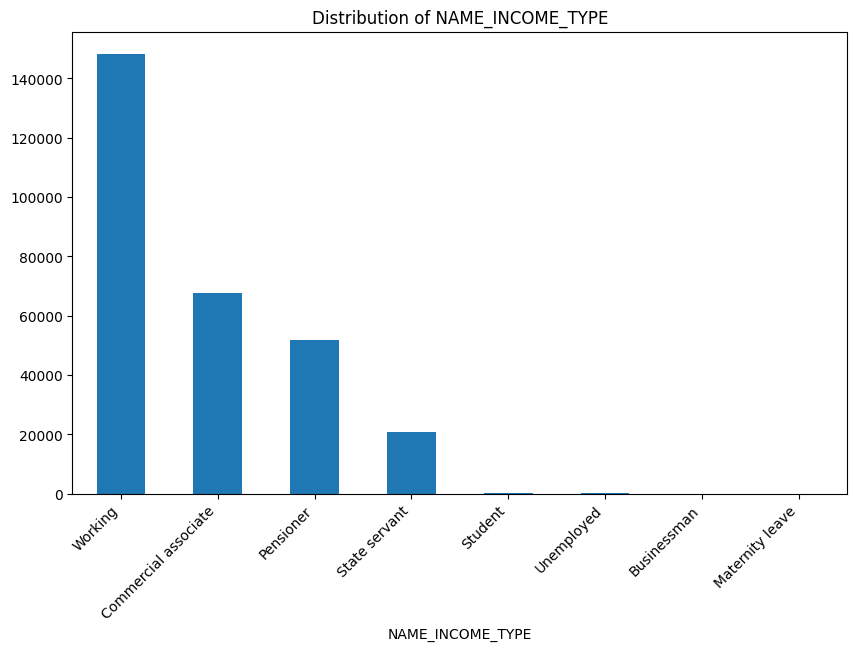

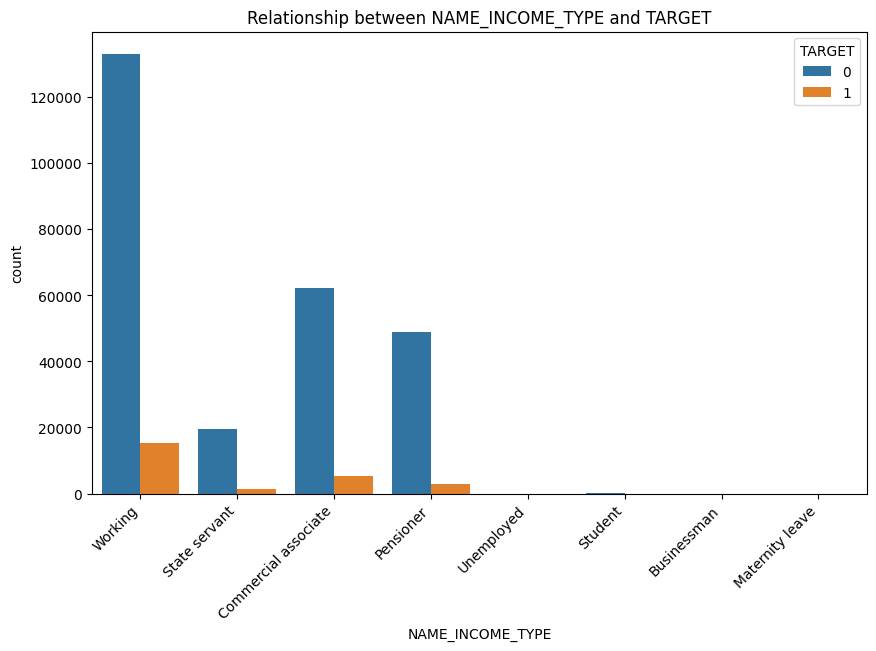

Analysis for: NAME_EDUCATION_TYPE
Unique values: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Value counts:
NAME_EDUCATION_TYPE
Secondary / secondary special    203516
Higher education                  71706
Incomplete higher                  9655
Lower secondary                    3418
Academic degree                     157
Name: count, dtype: int64
--------------------------------------------------


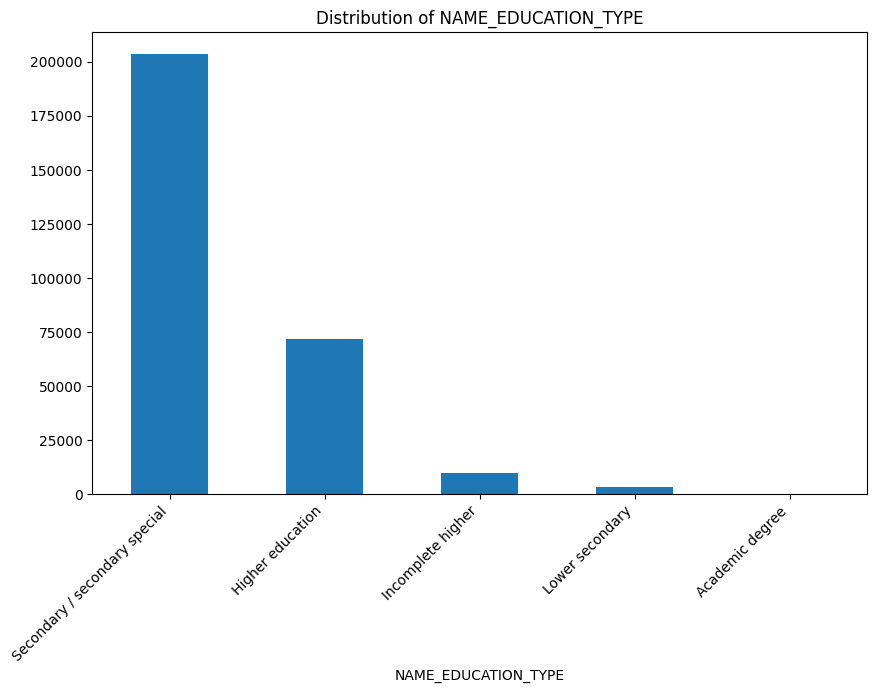

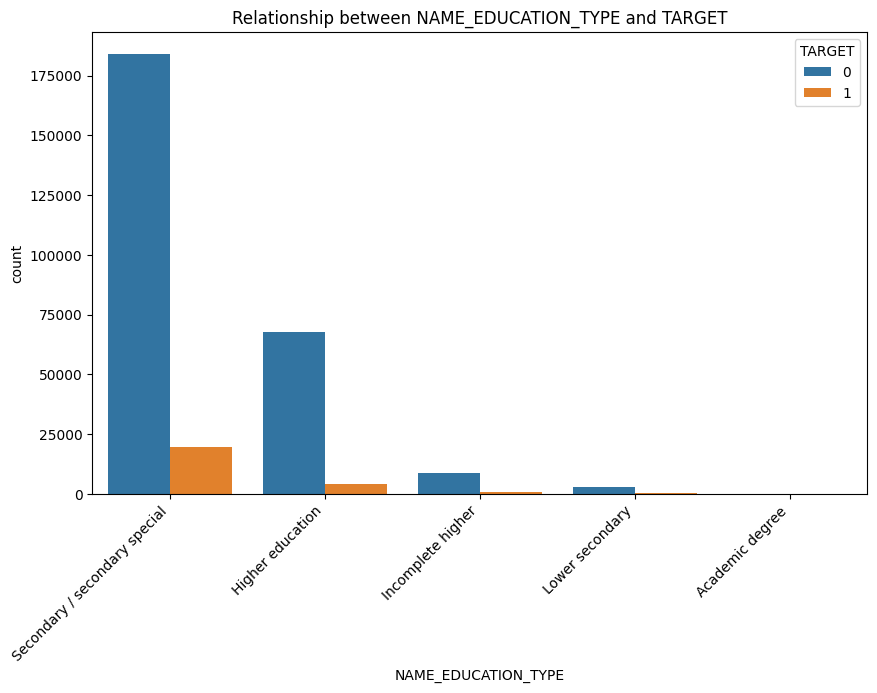

Analysis for: NAME_FAMILY_STATUS
Unique values: ['Single / not married' 'Married' 'Widow' 'Civil marriage' 'Separated'
 'Unknown']
Value counts:
NAME_FAMILY_STATUS
Married                 184574
Single / not married     42291
Civil marriage           27618
Separated                18830
Widow                    15138
Unknown                      1
Name: count, dtype: int64
--------------------------------------------------


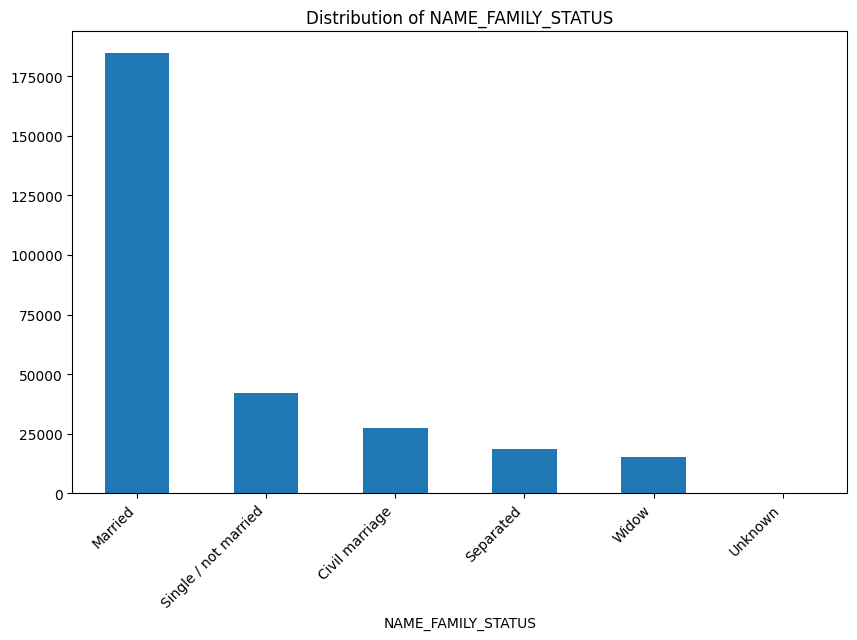

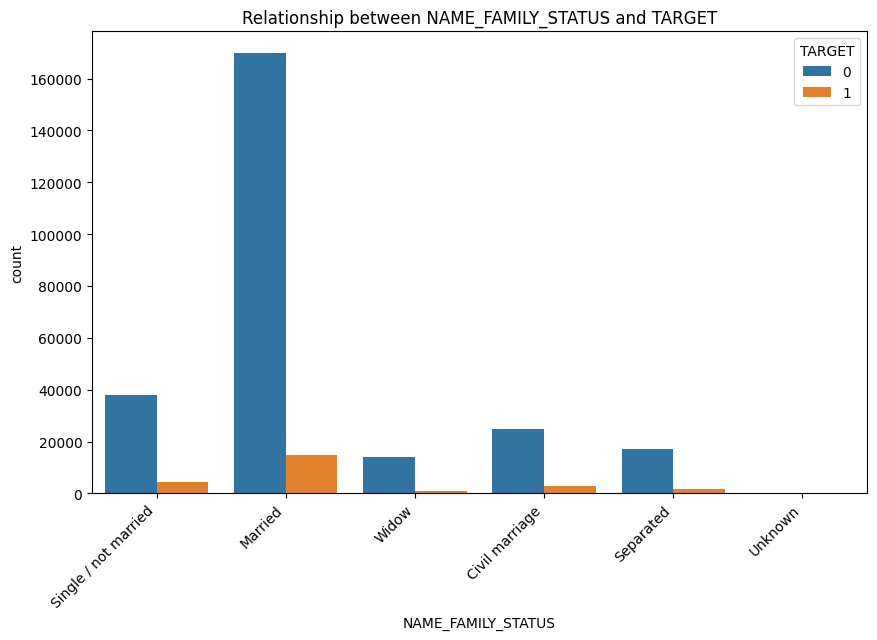

In [12]:
# Analyze categorical features
categorical_features = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']

for col in categorical_features:
    print(f"Analysis for: {col}")
    print(f"Unique values: {data[col].unique()}")
    print(f"Value counts:\n{data[col].value_counts()}")
    print("-" * 50)

    # Plotting value counts
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Analyze relationship with target variable (assuming 'TARGET' is the target column)
    if 'TARGET' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='TARGET', data=data)
        plt.title(f'Relationship between {col} and TARGET')
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [13]:
# Check the columns have null values
columns_list = data.columns.tolist()
percent_nan=data.isnull().sum()/len(data)*100
percent_nan.sort_values(ascending=False).head(50)

EXT_SOURCE_1                    56.013479
NONLIVINGAREA_AVG               52.217700
NONLIVINGAREA_MODE              52.217700
NONLIVINGAREA_MEDI              52.217700
ELEVATORS_AVG                   50.210087
ELEVATORS_MEDI                  50.210087
ELEVATORS_MODE                  50.210087
WALLSMATERIAL_MODE              47.592667
APARTMENTS_MODE                 47.495597
APARTMENTS_MEDI                 47.495597
APARTMENTS_AVG                  47.495597
ENTRANCES_AVG                   47.068143
ENTRANCES_MEDI                  47.068143
ENTRANCES_MODE                  47.068143
LIVINGAREA_AVG                  46.902431
LIVINGAREA_MEDI                 46.902431
LIVINGAREA_MODE                 46.902431
HOUSETYPE_MODE                  46.884404
FLOORSMAX_AVG                   46.441349
FLOORSMAX_MODE                  46.441349
FLOORSMAX_MEDI                  46.441349
YEARS_BEGINEXPLUATATION_MODE    45.397154
YEARS_BEGINEXPLUATATION_AVG     45.397154
YEARS_BEGINEXPLUATATION_MEDI    45

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [15]:
# Iterative Imputer (MICE) for EXT_SOURCE_1
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)
data[['EXT_SOURCE_1']] = iterative_imputer.fit_transform(data[['EXT_SOURCE_1']])

In [16]:
# Median/Mean Imputation for NONLIVINGAREA_*, ELEVATORS_*, APARTMENTS_*, ENTRANCES_*, LIVINGAREA_*
median_imputation_columns = [
    'NONLIVINGAREA_AVG', 'ELEVATORS_AVG', 'APARTMENTS_AVG',
    'ENTRANCES_AVG', 'LIVINGAREA_AVG'
]
for col in median_imputation_columns:
    data[col] = data[col].fillna(data[col].median())  # Replace with .mean() if preferred

In [17]:
# Fill with 'Missing' for WALLSMATERIAL_MODE, HOUSETYPE_MODE, EMERGENCYSTATE_MODE
categorical_columns = ['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [18]:
# Iterative Imputer (MICE) for YEARS_BEGINEXPLUATATION_*
data[['YEARS_BEGINEXPLUATATION_AVG']] = iterative_imputer.fit_transform(data[['YEARS_BEGINEXPLUATATION_AVG']])

In [19]:
# Iterative Imputer for TOTALAREA_MODE
data[['TOTALAREA_MODE']] = iterative_imputer.fit_transform(data[['TOTALAREA_MODE']])

In [20]:
# Mode Imputation for OCCUPATION_TYPE (Faster Alternative)
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0])
# Mode Imputation with Conditional Probability for NAME_TYPE_SUITE
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna(data['NAME_TYPE_SUITE'].mode()[0])

In [21]:
# Median Imputation for AMT_REQ_CREDIT_BUREAU_*
credit_columns = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]
for col in credit_columns:
    data[col] = data[col].fillna(data[col].median())

# Median Imputation for DEF_30_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE
social_columns = [
    'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'
]
for col in social_columns:
    data[col] = data[col].fillna(data[col].median())

In [22]:
high_missing_columns = [
    'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
    'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE',
    'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE'
]
for col in high_missing_columns:
    data[col] = data[col].fillna(data[col].median())

In [23]:
iterative_columns = [
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'EXT_SOURCE_3'
]
data[iterative_columns] = iterative_imputer.fit_transform(data[iterative_columns])

In [24]:
# Iterative Imputer for EXT_SOURCE_2, AMT_GOODS_PRICE, CNT_FAM_MEMBERS
low_missing_columns = ['EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']
data[low_missing_columns] = iterative_imputer.fit_transform(data[low_missing_columns])

In [25]:
# Fill DAYS_LAST_PHONE_CHANGE with Median
data['DAYS_LAST_PHONE_CHANGE'] = data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].median())

In [26]:
data['AMT_ANNUITY'] = data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].median())

In [27]:
# Check no null values
percent_nan = data.isnull().sum()/len(data)*100
percent_nan.sum()

0.0

In [28]:
# Remove negative values
date_related_columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' ,"DAYS_ID_PUBLISH" ,]  
for col in date_related_columns:
    data[col] = abs(data[col])

    # Descriptive statistics
    print(f"Done for: {col}")
    

Done for: DAYS_BIRTH
Done for: DAYS_EMPLOYED
Done for: DAYS_REGISTRATION
Done for: DAYS_ID_PUBLISH


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Normalizations for the following columns
# Columns to normalize
columns_to_normalize = [
    'SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
    'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'
]

# Apply Min-Max Normalization
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [31]:
cateogrical_cols=data.select_dtypes(include=["object"]).columns

for cat in cateogrical_cols:
    print(f"Category: {cat}  Values: {data[cat].unique()}")

Category: NAME_CONTRACT_TYPE  Values: ['Cash loans' 'Revolving loans']
Category: CODE_GENDER  Values: ['M' 'F' 'XNA']
Category: FLAG_OWN_CAR  Values: ['N' 'Y']
Category: FLAG_OWN_REALTY  Values: ['Y' 'N']
Category: NAME_TYPE_SUITE  Values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Category: NAME_INCOME_TYPE  Values: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Category: NAME_EDUCATION_TYPE  Values: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Category: NAME_FAMILY_STATUS  Values: ['Single / not married' 'Married' 'Widow' 'Civil marriage' 'Separated'
 'Unknown']
Category: NAME_HOUSING_TYPE  Values: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Category: OCCUPATION_TYPE  Values: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'D

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Initialize a label encoder
label_encoder = LabelEncoder()

# Columns to encode
label_encoding_columns = ['NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']
one_hot_encoding_columns = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

# Apply label encoding
for col in label_encoding_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Apply one-hot encoding
data = pd.get_dummies(data, columns=one_hot_encoding_columns, drop_first=False)

# Output transformed data
data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0.000000,1,0,0.001512,0.090287,0.090032,0.077441,4,0.018801,0.111161,...,False,False,False,False,False,False,True,False,True,False
1,0.000003,0,0,0.002089,0.311736,0.132924,0.271605,1,0.003541,0.522886,...,False,True,False,False,False,False,False,False,True,False
2,0.000006,0,0,0.000358,0.022472,0.020025,0.023569,4,0.010032,0.651466,...,False,False,False,False,False,True,False,False,True,False
4,0.000014,0,0,0.000819,0.116854,0.078975,0.117845,4,0.028663,0.701409,...,False,False,False,False,False,True,False,False,True,False
5,0.000017,0,0,0.000627,0.111235,0.101018,0.103255,4,0.035792,0.532807,...,False,False,False,False,False,True,False,False,True,False


In [34]:
x= data.drop(columns=['TARGET'])
y= data['TARGET']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,train_size=0.8)

In [37]:
data['TARGET'].value_counts()

TARGET
0    263627
1     24825
Name: count, dtype: int64

In [38]:
def cal(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    proba = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class

    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre)
    f1 = f1_score(y_test, pre)
    auc = roc_auc_score(y_test, proba)

    sns.heatmap(confusion_matrix(y_test, pre), annot=True)

    print(f"Accuracy: {accuracy}    Recall: {recall}    F1: {f1}    AUC: {auc}")


In [39]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

def train_and_evaluate_xgboost(model ,X_train, y_train, X_test, y_test):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=False)
    print("\nClassification Report:")
    print(report)
    
    # ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

In [45]:
RF_Model = RandomForestClassifier()

Confusion Matrix:
[[52693    33]
 [ 4783   182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     52726
           1       0.85      0.04      0.07      4965

    accuracy                           0.92     57691
   macro avg       0.88      0.52      0.51     57691
weighted avg       0.91      0.92      0.88     57691


ROC-AUC Score: 0.7364235820756294


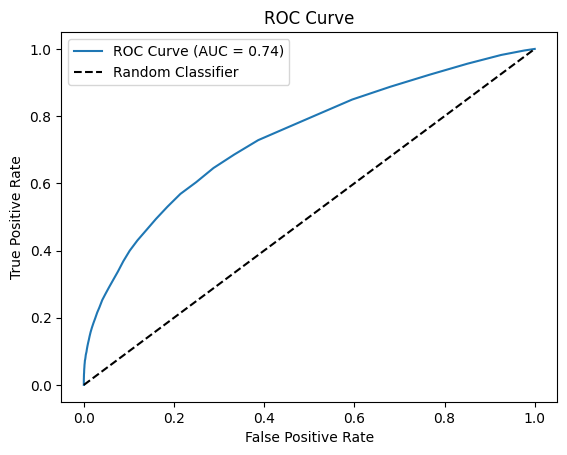

In [46]:
train_and_evaluate_xgboost(RF_Model, x_train, y_train, x_test, y_test)

In [40]:
from xgboost import XGBClassifier

In [41]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)
# Define the XGBoost model
model_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)

10.619385699899295


Confusion Matrix:
[[40333 12393]
 [ 1831  3134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     52726
           1       0.20      0.63      0.31      4965

    accuracy                           0.75     57691
   macro avg       0.58      0.70      0.58     57691
weighted avg       0.89      0.75      0.80     57691


ROC-AUC Score: 0.7703517250576132


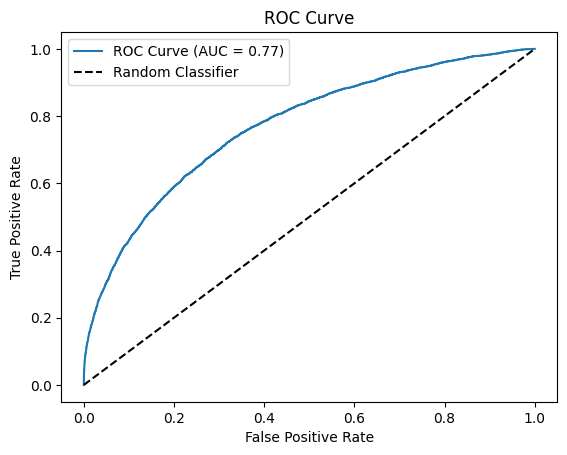

In [42]:
train_and_evaluate_xgboost(model_xgb, x_train, y_train, x_test, y_test)

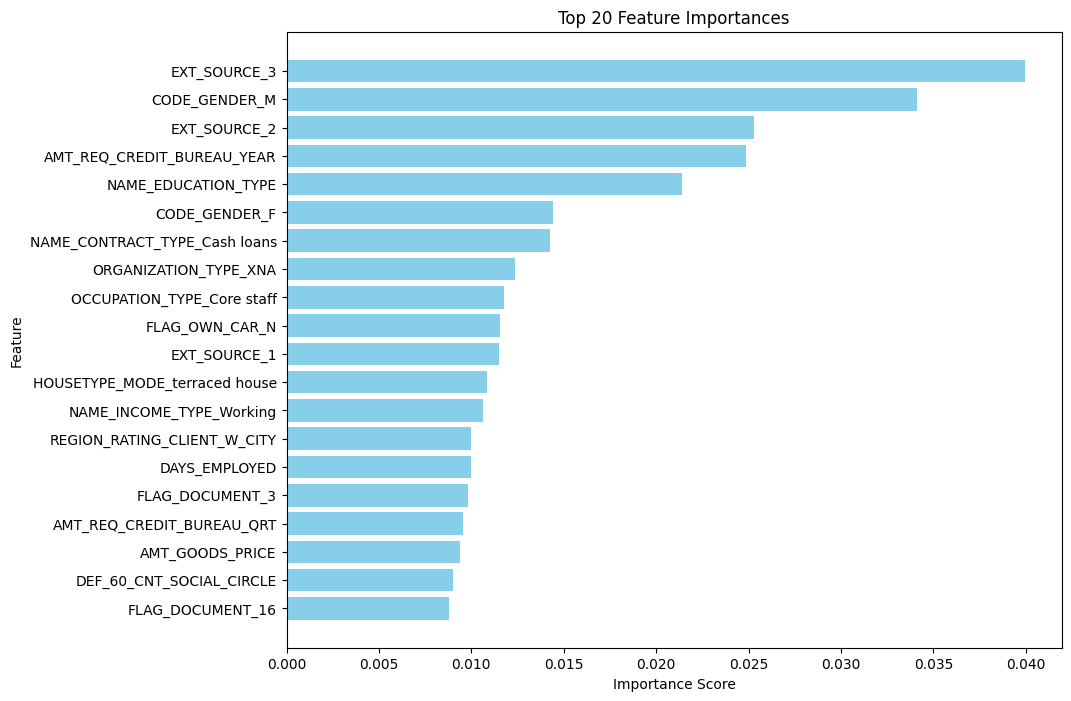

In [43]:
# Extract feature importances
feature_importances = model_xgb.feature_importances_
features = x_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 20 features
top_features = importance_df.head(20)
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [44]:
# Finaly Save the model
import h5py

model_path = 'Home_Credit_xgboost_model.h5'

# Save the model in .h5 format
model_booster = model_xgb.get_booster()
model_binary = model_booster.save_raw()
with h5py.File(model_path, "w") as h5_file:
    h5_file.create_dataset("xgboost_model", data=np.void(model_binary))